<a href="https://colab.research.google.com/github/potgieterphiline/UdemyTrainingCode/blob/main/SVM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,
f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv("/content/sample_data/mushrooms-full-dataset.csv")

In [ ]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
data['poisonous'].value_counts()

,count
poisonous,
e,4208
p,3916


In [ ]:
data.isnull().sum()

,0
poisonous,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
target = data['poisonous']
inputs = data.drop('poisonous',axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state = 365, stratify = target)

In [ ]:
y_train.value_counts()

,count
poisonous,
e,3365
p,3134


In [ ]:
y_test.value_counts()

,count
poisonous,
e,843
p,782


In [ ]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

In [ ]:
x_train_transf = enc_i.fit_transform(x_train)
x_test_transf = enc_i.transform(x_test)

y_train_transf = enc_t.fit_transform(y_train)
y_test_transf = enc_t.transform(y_test)

In [ ]:
y_train_transf

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
x_train_transf

array([[3., 2., 2., ..., 7., 4., 0.],
       [5., 2., 4., ..., 7., 4., 4.],
       [2., 3., 2., ..., 7., 4., 2.],
       ...,
       [2., 3., 4., ..., 3., 5., 4.],
       [3., 2., 2., ..., 7., 4., 4.],
       [3., 0., 3., ..., 7., 2., 1.]])

In [ ]:
scaling = MinMaxScaler(feature_range = (-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

In [ ]:
x_train_rescaled

array([[ 0.2       ,  0.33333333, -0.55555556, ...,  0.75      ,
         0.6       , -1.        ],
       [ 1.        ,  0.33333333, -0.11111111, ...,  0.75      ,
         0.6       ,  0.33333333],
       [-0.2       ,  1.        , -0.55555556, ...,  0.75      ,
         0.6       , -0.33333333],
       ...,
       [-0.2       ,  1.        , -0.11111111, ..., -0.25      ,
         1.        ,  0.33333333],
       [ 0.2       ,  0.33333333, -0.55555556, ...,  0.75      ,
         0.6       ,  0.33333333],
       [ 0.2       , -1.        , -0.33333333, ...,  0.75      ,
        -0.2       , -0.66666667]])

In [ ]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(x_train_rescaled, y_train_transf)

In [ ]:
y_pred_test = svc.predict(scaling.transform(x_test_transf))

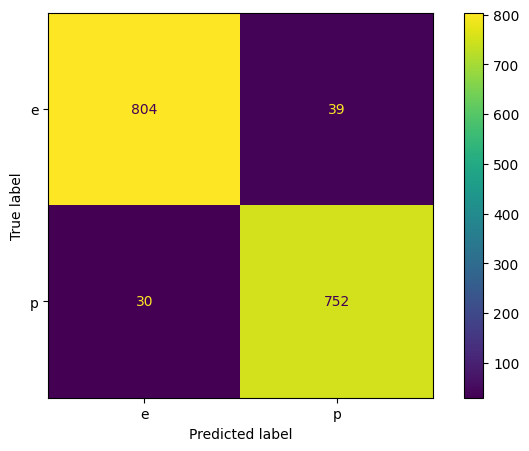

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))

cmp = ConfusionMatrixDisplay( confusion_matrix(y_test_transf, y_pred_test), display_labels = enc_t.classes_)
cmp.plot(ax = ax);

In [ ]:
print(classification_report(y_test_transf, y_pred_test, target_names = ['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       0.96      0.95      0.96       843
   Poisonous       0.95      0.96      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [ ]:
tuned_parameters = [ {"kernel":["linear"], "C":[1,10,20]},
                      {"kernel":["poly"], "C":[1,10,20]},
                    {"kernel":["rbf"],"gamma":[1e-3,1e-4] , "C":[1,10,20]}
                     ]

In [ ]:
scores = ["precision", "recall"]

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set:

0.958 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.961 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.962 (+/-0.014) for {'C': 20, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 20, 'kernel': 'poly'}
0.929 (+/-0.011) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.897 (+/-0.010) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.949 (+/-0.006) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.929 (+/-0.011) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.951 (+/-0.006) for {'C': 20, 'gamma': 0.001, 'kernel': 'rbf'}
0.936 (+/-0.009) for {'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    reca